<a href="https://colab.research.google.com/github/ravisiddam/DL_Project_1/blob/master/Machine_Learning_Basics_Python_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning Python Introduction

In this colaboratory notebook, you learn to work with python and machine learning models. we learn to designe and complete small projects.





---











Import **numpy** which is the fundamental package for scientific computing with Python.


*  mainly useful for N-dimensional array objects




Import **pandas** which is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


Here is an overview of what we are going to cover:


* Loading the dataset.
* Summarizing the dataset.
* Visualizing the dataset.
* Evaluating machine learning algorithms.
* Making some predictions.
* Present the result




To make sure that every single line will be  printed, even if they're in the same cell, we can use the following config:

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## breast_cancer DataSet


The breast cancer dataset is a classic and easy to use binary classification dataset.

>-   |  -
>---|---
> Classes	| 2
> Samples per class	|212(M),357(B)
> Samples total	|569
> Dimensionality	|30
> Features | 	real, positive



 **data : Bunch**

Dictionary-like object, 
*  the interesting attributes are: ‘data’
*  the data to learn, ‘target’, 
*  the classification labels, ‘target_names’
*  the meaning of the labels, ‘feature_names’
*  the meaning of the features, and ‘DESCR’, the full description of the dataset
*  ‘filename’, the physical location of breast cancer csv dataset (added in version 0.20).


#### load data from sklearn data sets

scikit-learn - the machine learning algorithms used for data analysis and data mining tasks




In [0]:
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()
breast_df = pd.DataFrame(data= np.c_[breast_data['data'], breast_data['target']],
                         columns= breast_data['feature_names'].tolist() + ['target'] )


Let's check the shapes of the dataframes:

In [0]:

print(breast_data.data.shape)
print(breast_data.target.shape)
list(breast_data.target_names)


(569, 30)
(569,)


['malignant', 'benign']

**Statistical Summary**

In [0]:
print(breast_df.describe())


       mean radius  mean texture  ...  worst fractal dimension      target
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]


## Splitting data to training and testing sets

To investigate performance of our model, we need to split the data to training and testing sets. This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_data.data, breast_data.target, test_size=0.30, random_state=5)




# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models in our dataset:

* Logistic regression
* *K- nearest neighbour *
* Naive Bayes
* Random forest
* Support vector machine

# K nearest neighbour(KNN)



In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=20)

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [0]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)



[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]
[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]
Hello world


# Performance measure

To assess performance of the machine learning model, we can use the following measure of the performance of the model:

* **Accuracy**: This measure gives you a sense of performance for all the classes together as follows:

\begin{equation*} Accuracy=\frac{Number\:of\:correct\:predictions}{(Total\:number\:of\:data\:points (samples))} \end{equation*}


* **Confusion matrix (or error matrix)**: True and false classification of the samples in all the classes can be shown in a matrix which is called confusion (or error) matrix. The columns are usually considered as the predicted classes and rows as actual classes. Hence, the diagonal elements of the matrix will be the total number of true classifcation in each class. 



In [0]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))


accuracy of the predictions: 0.9707602339181286
Confusion matrix of the predictions:
 [[ 56   5]
 [  0 110]]


In [0]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)


# these are you training data points:
# features and targets
X = breast_data.data
y = breast_data.target

accuracies = []
for train_index, test_index in kf.split(X):

    data_train   = X[train_index]
    target_train = y[train_index]

    data_test    = X[test_index]
    target_test  = y[test_index]


    knn = KNeighborsClassifier()
    knn.fit(data_train,target_train)

    preds = knn.predict(data_test)

    # accuracy for the current fold only    
    accuracy = metrics.accuracy_score(target_test,preds)

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)
print("\n",average_accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


 0.936686849868033


LR: 0.952553951249806, 0.02259216207824357
KNN: 0.9262071106970966, 0.03617389403333163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Text(0.5, 0.98, 'Algorithm Comparison')

{'LR': array([0.9122807 , 0.94736842, 0.97368421, 0.97368421, 0.95575221]), 'KNN': array([0.85964912, 0.92105263, 0.96491228, 0.94736842, 0.9380531 ])}


{'boxes': [<matplotlib.lines.Line2D at 0x7fed950950f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed950959e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fed9509d400>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fed9509d0b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fed95095358>,
  <matplotlib.lines.Line2D at 0x7fed9509ddd8>]}

[Text(0, 0, 'LR'), Text(0, 0, 'KNN')]

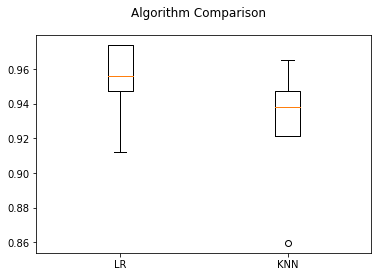

In [0]:

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = {}
names = []
scoring = 'accuracy'
for name, model in [('LR', LogisticRegression()),('KNN', KNeighborsClassifier())]:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, breast_data.data, breast_data.target, cv=kfold, scoring=scoring)
  #names.append(name)
	results.update({name:cv_results})
	print(f'{name}: {cv_results.mean()}, {cv_results.std()}')

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
print(results)
plt.boxplot(results.values())
ax.set_xticklabels(results.keys())
plt.show()



----

#Useful Links

### Installation instructions




*   [scikit-learn](https://scikit-learn.org/stable/install.html)
*   [Anaconda distribution of Python](https://store.continuum.io/cshop/anaconda/)
*   [IPython](http://ipython.org/install.html)


### Data Sets

*  [scikit-learn DataSet](https://scikit-learn.org/stable/datasets/index.html)





